In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random as rnd
path = "/Volumes/SamuelSSD/School/GTC 2021-22 Courses/CompPsych/presentation/plots/"


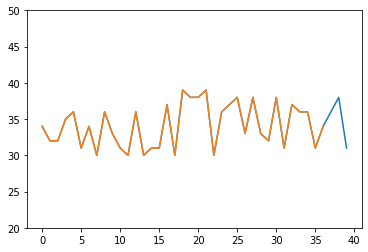

In [5]:
y = np.random.randint(30, 40, size=(40))
plt.plot(y)
plt.ylim(20,50)
plt.plot(y[:-3])
plt.ylim(20,50)
plt.savefig(path + '1.png')
plt.show()

In [9]:
def Drift_walk(drift,bounds,howmany,k,mean,coh):
    correct = drift
    incorrect = 1-correct
    rate = correct/incorrect
    howmany = howmany
    limitup = bounds
    limitdown = -bounds

    Tlist = np.zeros(howmany)
    Alist = np.zeros(howmany)

    vlist = []
    rlist = []
    k = k



    for n in range(howmany):
        vlist1 = []
        rlist1 = []
        dummy = True
        v = 0.
        for s in range(100000):
            r = np.random.normal(loc=mean, scale=1.0, size=None)
            rlist1.append(r)
            r = r + coh
            v = v + k*r
            vlist1.append(v)    
            if v >= limitup:
                
                Tlist[n] = s
                Alist[n] = 1
                vlist1 = [0] + vlist1
                vlist.append(vlist1)
                rlist.append(rlist1)
                break
            elif v <= limitdown:
                
                Tlist[n] = s
                Alist[n] = 0
                vlist1 = [0] + vlist1
                rlist.append(rlist1)
                break
    
    return vlist,Tlist,Alist,drift,bounds,rlist



In [7]:
residualList = np.zeros(len(vlist51))

for n in range(len(residualList)):
    x = np.linspace(0,len(vlist51[n]),len(vlist51[n]))
    #plt.plot(x,vlist51[n])
    plt.show()
    y = k*coh*x
    #plt.plot(x,y)
    residualList[n] = y[-1] - vlist51[n][-1]
    
plt.hist(residualList)

NameError: name 'vlist51' is not defined

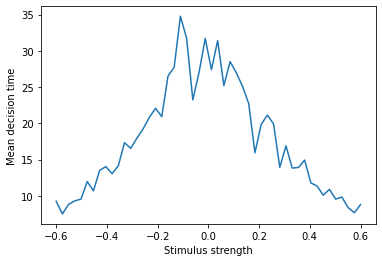

In [10]:
#vlist,Tlist,Alist,drift,bounds = random_walk(0.6,10,50)
cohs=np.linspace(-0.6,0.6,50)
meantimes=np.zeros(len(cohs))

for n in range(len(cohs)):
    k = 3
    coh = cohs[n]
    trial = 3
    vlist51,Tlist51,Alist51,drift51,bounds51,rlist = Drift_walk(0.50,15,50,k=k,mean=0,coh=coh)
    vlist,Tlist,Alist,drift,bounds,rlist = Drift_walk(0.50,10,50,k=k,mean=0,coh=coh)
    #x = np.linspace(0,len(vlist51[0]))
    #y = k*coh*x

    #plt.plot(vlist51[trial])
    #plt.plot(x, y, '-r')
    #plt.show()
    #plt.plot(rlist[trial])

    #plt.show()
    #plt.hist(Tlist51)
    #plt.show()
    meantimes[n] = np.mean(Tlist51)
plt.plot(cohs,meantimes)
plt.ylabel("Mean decision time")
plt.xlabel("Stimulus strength")
plt.savefig(path + 'K=3.png')

In [17]:
filenames = []
p = 0
coh1 = 0.3
coh2 = 0.6
k = 1
drift_rate1 = k*coh1
drift_rate2 = k*coh2

vlist51,Tlist51,Alist51,drift51,bounds51,rlist = Drift_walk(0.50,10,1,k=k,mean=0,coh=coh1)
vlist,Tlist,Alist,drift,bounds,rlist = Drift_walk(0.50,10,1,k=k,mean=0,coh=coh2)
x = np.linspace(0,len(vlist51[p]),10)
y1 = drift_rate1*x
y2 = drift_rate2*x

for n in range(len(vlist51[p])+10):
    
    if n <= len(vlist51[p]):
        plt.plot(vlist51[p][:n+1],label="Drift Rate: 0.3",color = "b")
    else:
        plt.plot(vlist51[p],label="Drift Rate: 0.3",color = "b")
    if n <= len(vlist[p]):
        plt.plot(vlist[p][:n+1],label="Drift Rate: 0.6",color = "r")
    else:
        plt.plot(vlist[p],label="Drift Rate: 0.6",color = "r")
    plt.plot(x,y1,color = "c",label = "Gradient 0.3")
    plt.plot(x,y2,color = "m",label = "Gradient 0.6")
    plt.axhline(y=10,label="Choice A Decision Boundary",color = "r")
    plt.axhline(y=-10,label="Choice B Decision Boundary",color = "g")
    plt.xlabel("Decision time")
    plt.legend(loc="lower right")
    plt.xlim(0,len(vlist51[p]))
    plt.ylim(-11,11)
    
    # create file name and append it to a list
    filename = path + f'{n}.png'
    filenames.append(filename)
    plt.show
    plt.savefig(filename)
    plt.close()



with imageio.get_writer(path + 'DrifDiffusion3.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

#plt.savefig(path + '1.png')


In [130]:
Alist

array([1.])

In [ ]:
for n in range(len(vlist51[p])):
    plt.plot(vlist[p][:n+1],label="Drift Rate: 0.51",color = "y")
    plt.axhline(y=10,label="Choice A Decision Boundary",color = "r")
    plt.axhline(y=-10,label="Choice B Decision Boundary",color = "g")
    plt.xlabel("Decision time")
    plt.legend()
    plt.xlim(0,len(vlist51[p]))
    plt.ylim(-11,11)
    
    # create file name and append it to a list
    filename = path + f'{n+len(vlist[p])}.png'
    filenames.append(filename)
    plt.show
    plt.savefig(filename)
    plt.close()